<a href="https://colab.research.google.com/github/flediak/Euclid_IA_KP_paper0/blob/main/notebooks/plots_sample_selection_hagn_fs2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HAGN-like sample selection in FS2.0

- For our reference measurements in HAGN we select galaxies at z=1.0 with absolute SDSS r-band magnitudes brighter than $M_r>20$ (footnote: the magnitudes where computed using bruzet charlot spectral templates with a model for internal dust extiction, as detailed in Laigle et al. 20XX). This magnitude cut ensures that all galaxies in the HAGN simulation have at least $621$ stellar particles, which for which we expect the major and minor axes orientations to be deterined sufficiently accurate for reliabel measured of IA statsitics (see appendix X in Hoffmann et al. 2022)


- In order to probe the dependence of galaxy alignment on luminosity, we construct 3 subsamples
in HAGN, that are obtained by splitting the main sample at $M_r=-21,-22$ (see Fig. ref)


- For the calibration of the FS2 IA model against the IA statsitics measured in HAGN, we select a main galaxy sample around z=1.0, which is defined in a thin redshift shell wiht the width of $\delta z = 0.0X$ and a cut in the SDSS r-band magnitude of $M_r<-19.3$. Note that the magnitude cut is slightly dimmer than the cut that we used for HAGN in order to ensure that we obtain the same galaxy number density as in HAGN (i.e. $n=X h^3/Mpc^3$), which should lead to similar clustering statistics (ref?). The magnitude sub-samples are selected by cuts at $M_r=-20.8,-22.1$, which are choses, such that the relative fractions of galaxies per sub-sample in FS2 are consistent with those in HAGN. The magnitude cuts and properties of the idfferent subsamples in FS2 and HAGN are summarized in Table X


galaxies per sample [%]: m1: 0.044, m2: 0.243, m3: 0.713

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# read data

In [3]:
!gdown 1--C5Kbol5_77r9NsRRw7eRMWDQfJC7l-

Downloading...
From: https://drive.google.com/uc?id=1--C5Kbol5_77r9NsRRw7eRMWDQfJC7l-
To: /content/hagn.csv.bz2
100% 25.2M/25.2M [00:00<00:00, 50.3MB/s]


In [4]:
!gdown 1J6eBPU0SzGV3J9pC4ialGt7nCuou9n5B

Downloading...
From: https://drive.google.com/uc?id=1J6eBPU0SzGV3J9pC4ialGt7nCuou9n5B
To: /content/hagn_fs2.csv.bz2
100% 102M/102M [00:02<00:00, 48.9MB/s] 


In [7]:
fs2 = pd.read_csv('hagn_fs2.csv.bz2')
hagn = pd.read_csv('hagn.csv.bz2')

# select main samples

In [8]:
mr_max_hagn = -20.0
mr_max_fs2 = -19.297298

In [9]:
fs2_main = fs2[fs2.sdss_r_abs_mag<mr_max_fs2]
hagn_main = hagn[hagn.r_sdss < mr_max_hagn]

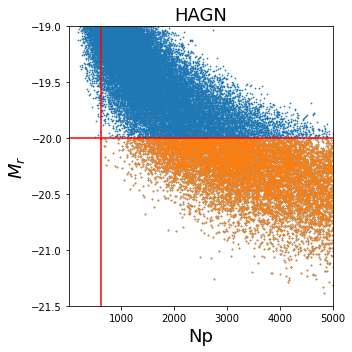

In [13]:
fig,ax = plt.subplots(1,1, figsize=(5,5), sharey=True, sharex=True)

Np_min = 621

fontsize=18

np_bins = np.linspace(10,1000,100)
m_bins = np.linspace(-20.5,-19,100)

cmap = 'gnuplot'

ax.scatter(hagn.Np, hagn.r_sdss, s=0.5)
ax.scatter(hagn_main.Np, hagn_main.r_sdss, s=0.5)

ax.set_title('HAGN', fontsize=fontsize)

ax.set_ylabel('$M_r$', fontsize=fontsize)

ax.axhline(y=mr_max_hagn, c='r')
ax.axvline(x=Np_min, c='r')
    
ax.set_ylim(-21.5,-19)
ax.set_xlim(10,5000)

ax.set_xlabel('Np', fontsize=fontsize)

plt.tight_layout()
    
plt.show()

# select subsamples

In [10]:
mag1_hagn, mag2_hagn = -22, -21

hagn_m3 = hagn_main[hagn_main.r_sdss > mag2_hagn]
hagn_m2 = hagn_main[((hagn_main.r_sdss < mag2_hagn) & (hagn_main.r_sdss >= mag1_hagn))]
hagn_m1 = hagn_main[(hagn_main.r_sdss < mag1_hagn)]

In [11]:
mag1_fs2, mag2_fs2 = -22.114857368577226, -20.820789337158203

fs2_m3 = fs2_main[fs2_main.sdss_r_abs_mag > mag2_fs2]
fs2_m2 = fs2_main[((fs2_main.sdss_r_abs_mag < mag2_fs2) & (fs2_main.sdss_r_abs_mag >= mag1_fs2))]
fs2_m1 = fs2_main[(fs2_main.sdss_r_abs_mag < mag1_fs2)]

# compare number densities

### comoving volume for FS2

In [15]:
!pip install colossus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 5.2 MB/s 


In [16]:
from colossus.cosmology import cosmology
params = {'flat': True, 'H0': 67.0, 'Om0': 0.319, 'Ob0': 0.049, 'sigma8': 0.83, 'ns': 0.96}
cosmology.addCosmology('Flagship', params)
cosmo_flagship = cosmology.setCosmology('Flagship')

In [19]:
#radial range
z_min, z_max = 0.99, 1.01
r_min = cosmo_flagship.comovingDistance(0,z_min, transverse = False)
r_max = cosmo_flagship.comovingDistance(0,z_max, transverse = False)

# angular range
f = np.pi/180.
ra_min, ra_max = 30*f, 60*f
dec_min, dec_max = 30*f, 60*f

vol_fs2 = (ra_max-ra_min)*(-np.cos(dec_max)+np.cos(dec_min))*(r_max**3 - r_min**3)/3. #Mpc/h

#equivalent box length
print('FS2 volume corresponds to box with side legth of', vol_fs2**(1./3.), ' Mpc/h \n')

### comoving volume HAGN

Lbox_hagn=100. #Mpc/h

vol_hagn = Lbox_hagn**3

### comparison

print('comoving number density FS2 main: ',len(fs2_main)/vol_fs2)
print('comoving number density FS2 m1: ',len(fs2_m1)/vol_fs2)
print('comoving number density FS2 m2: ',len(fs2_m2)/vol_fs2)
print('comoving number density FS2 m3: ',len(fs2_m3)/vol_fs2)

print('\n')

print('comoving number density HAGN main: ',len(hagn_main)/vol_hagn)
print('comoving number density HAGN m1: ',len(hagn_m1)/vol_hagn)
print('comoving number density HAGN m2: ',len(hagn_m2)/vol_hagn)
print('comoving number density HAGN m3: ',len(hagn_m3)/vol_hagn)

FS2 volume corresponds to box with side legth of 322.09951780007555  Mpc/h 

comoving number density FS2 main:  0.022672088334090103
comoving number density FS2 m1:  0.0009968216146720142
comoving number density FS2 m2:  0.005503600830428492
comoving number density FS2 m3:  0.0161716658889896


comoving number density HAGN main:  0.022608
comoving number density HAGN m1:  0.000994
comoving number density HAGN m2:  0.005488
comoving number density HAGN m3:  0.016126


### plot differential number denisties

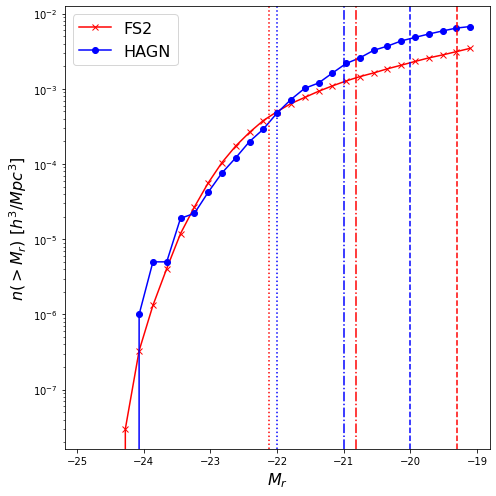

In [23]:
vmag = np.linspace(-25,-19,30)

hist_mr_fs2, bin_edges = np.histogram(fs2.sdss_r_abs_mag, bins=vmag)
hist_mr_hagn, bin_edges = np.histogram(hagn.r_sdss, bins=vmag)

bin_centers = 0.5*(bin_edges[1:]+bin_edges[:-1])

#ncum_Mr_flagship = np.cumsum(hist_flagship)/vol_flagship
#ncum_Mr_hagn = np.cumsum(hist_hagn)/vol_hagn

hist_mr_fs2

bin_centers

fig,ax = plt.subplots(1,1, figsize=(7,7), sharex=True, sharey=True)

ax.plot(bin_centers , hist_mr_fs2/vol_fs2, label = 'FS2', c='r', marker='x')
ax.plot(bin_centers , hist_mr_hagn/vol_hagn, label = 'HAGN', c='b', marker='o')

#==== sample ====
ax.axvline(x=mr_max_hagn, c='b', linestyle='--')
ax.axvline(x=mr_max_fs2, c='r', linestyle='--')

ax.axvline(x=mag1_hagn, c='b', linestyle=':')
ax.axvline(x=mag1_fs2, c='r', linestyle=':')

ax.axvline(x=mag2_hagn, c='b', linestyle='-.')
ax.axvline(x=mag2_fs2, c='r', linestyle='-.')

ax.set_xlabel('$M_r$', fontsize=fontsize)

ax.set_ylabel('$n(>M_r) \ [h^3 / Mpc^3]$', fontsize=fontsize)

ax.set_yscale('log')

ax.legend(loc='upper left', fontsize=fontsize)

ax.set_yscale('log')
#ax.set_ylim(10**-7,0.1)
#ax.set_xlim(-24.5,-19)


plt.tight_layout()
plt.show()



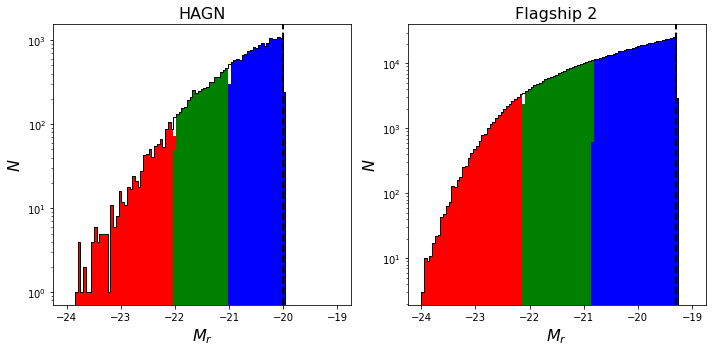

In [24]:

fig,ax = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=False)

fontsize=16

mbins = np.linspace(-24,-19,100)

ax[0].hist(hagn_m1.r_sdss,bins=mbins, color='r')
ax[0].hist(hagn_m2.r_sdss,bins=mbins, color='g')
ax[0].hist(hagn_m3.r_sdss,bins=mbins, color='b')
ax[0].hist(hagn_main.r_sdss,bins=mbins, histtype='step', color='k')

ax[1].hist(fs2_m1.sdss_r_abs_mag,bins=mbins, color='r')
ax[1].hist(fs2_m2.sdss_r_abs_mag,bins=mbins, color='g')
ax[1].hist(fs2_m3.sdss_r_abs_mag,bins=mbins, color='b')
ax[1].hist(fs2_main.sdss_r_abs_mag,bins=mbins, histtype='step', color='k')

for i in range(2):
    ax[i].set_xlabel('$M_r$', fontsize=fontsize)
    ax[i].set_ylabel('$N$', fontsize=fontsize)

#ax[0].axvline(x=hagn_Mrcut, c='k')
#ax[1].axvline(x=flagship_Mrcut, c='k')

ax[0].axvline(x=mr_max_hagn, c='k', linestyle='--', linewidth=2)
ax[1].axvline(x=mr_max_fs2, c='k', linestyle='--', linewidth=2)

ax[0].set_yscale('log')
ax[1].set_yscale('log')

ax[0].set_title('HAGN', fontsize=fontsize)
ax[1].set_title('Flagship 2', fontsize=fontsize)

plt.tight_layout()
plt.show()